In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

- Mise à l'echelle commune de variables

In [17]:
sns.set_theme(rc = {"figure.figsize": (10, 4)})

In [20]:
df = pd.read_csv('df_without_na.csv')
print(df.shape)
# df.dropna(inplace=True)
df.head()

(35000, 7)


,nom,age,langue,genre,nombre_enfant,titre,salaire
0,James,46.0,chinois,Masculin,7,Fonctionaire,269533.0
1,Haroun,71.0,arabe,Masculin,6,Fonctionaire,414675.0
2,Sherif,63.0,Russe,Masculin,4,Fonctionaire,273929.0
3,Cisse,60.0,Allemand,Masculin,0,Fonctionaire,467578.0
4,Robert,43.0,Allemand,Feminin,7,Retraite,762622.0


In [36]:
draft = copy = df = df[['age','salaire']]

1- Verifier les dispersions de donnees

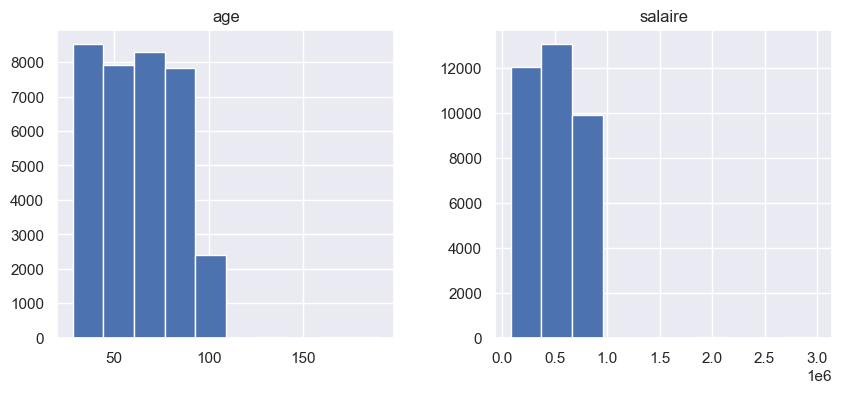

In [23]:
df[['age', 'salaire']].hist()
plt.show()

In [24]:
df[['age', 'salaire']].describe()

,age,salaire
count,35000.000000,3.500000e+04
mean,62.409343,4.918192e+05
std,20.305755,2.391821e+05
min,28.000000,8.000300e+04
25%,45.000000,2.913550e+05
50%,62.000000,4.914040e+05
75%,80.000000,6.911805e+05
max,190.000000,3.000000e+06


2- VERIFIER LA PRESENCE DES OUTLIERS

In [29]:
def displayOutliers(data):
    sns.boxplot(data)
    plt.show()

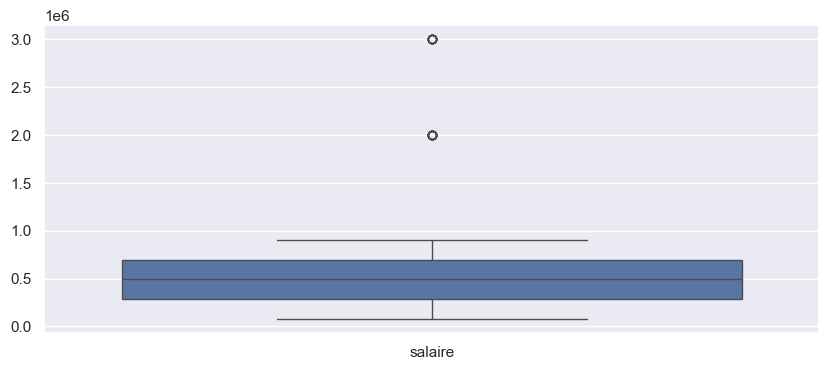

In [34]:
displayOutliers(df[['salaire']])

---
- **Remplacement des outliers par la methode des QUARTILES**

In [ ]:

def drop_outliers(data, feature) -> None:
    Q1 = np.percentile(data[feature], 25)
    Q3 = np.percentile(data[feature], 75)
    limit = 1.5*(Q3 - Q1)
    
    data.drop(data[data[feature] > (limit + Q3)].index, inplace = True)
    data.drop(data[data[feature] < (Q1 - limit)].index, inplace = True)

In [ ]:

for col in draft.columns:
    drop_outliers(draft, col)

---
### **Standardisation**

#  $$x' = \frac{x_{i} - \mu}{\sigma}$$

---
- ### **Normalisation**

#  $x' = \frac{x - x_{min}}{x_{max} - x_{min}}$

---
 - #### **RobustScaler**: applicable sur des données numériques ayant une distribution quelconque (excepté normale)
  - # $x' = \frac{x_{i} - Q_{2}}{Q_{3} - Q_{1}}$

In [38]:
data_rs = pd.DataFrame(RobustScaler().fit_transform(df), columns = df.columns)

- Graphique avant l'application de robustScaler

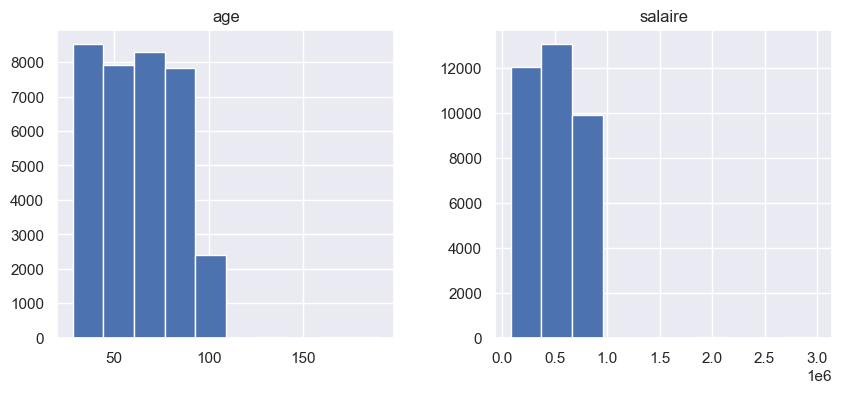

In [44]:
df.hist()
plt.show()

- Graphique apres avoir applique robustScaler


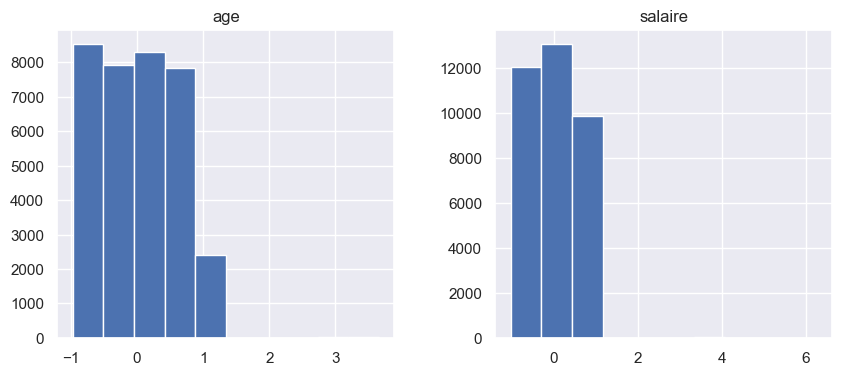

In [41]:
data_rs.hist()
plt.show()

In [43]:
df.describe()

,age,salaire
count,35000.000000,3.500000e+04
mean,62.409343,4.918192e+05
std,20.305755,2.391821e+05
min,28.000000,8.000300e+04
25%,45.000000,2.913550e+05
50%,62.000000,4.914040e+05
75%,80.000000,6.911805e+05
max,190.000000,3.000000e+06


In [42]:
data_rs.describe()

,age,salaire
count,35000.000000,35000.000000
mean,0.011696,0.001039
std,0.580164,0.598216
min,-0.971429,-1.028951
25%,-0.485714,-0.500341
50%,0.000000,0.000000
75%,0.514286,0.499659
max,3.657143,6.274227
